# Context 
Tương tự Lesson 3 <br>
Thuật toán sử dụng là Decision Tree và Random Forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report
)

# kiem dinh cheo
from sklearn.model_selection import GridSearchCV 

In [2]:
# Get data set employee
link = "https://drive.google.com/file/d/1BDDaPR6nBXyeihV6KJ3rreOEe63GnX5f/view"
path = "https://drive.google.com/uc?export=download&id=" + link.split("/")[-2]

df = pd.read_csv(path)
df.head(10)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no
5,5,35,management,single,tertiary,no,747,no,no,cellular,141,2,176,3,failure,no
6,6,36,self-employed,married,tertiary,no,307,yes,no,cellular,341,1,330,2,other,no
7,7,39,technician,married,secondary,no,147,yes,no,cellular,151,2,-1,0,unknown,no
8,8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,57,2,-1,0,unknown,no
9,9,43,services,married,primary,no,-88,yes,yes,cellular,313,1,147,2,failure,no


> **Thong tin co ban**

<table border="1" style="border-collapse: collapse; width: 100%;">
  <thead>
    <tr>
      <th style="text-align:center">Feature</th>
      <th style="text-align:center">Variable Type</th>
      <th style="text-align:center">Value Type</th>
      <th style="text-align:center">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>age</td>
      <td>Numerical</td>
      <td>Integer</td>
      <td>Age of the client in years.</td>
    </tr>
    <tr>
      <td>job</td>
      <td>Categorical</td>
      <td>String</td>
      <td>Type of job (e.g., unemployed, services, management).</td>
    </tr>
    <tr>
      <td>marital</td>
      <td>Categorical</td>
      <td>String</td>
      <td>Marital status (e.g., single, married, divorced).</td>
    </tr>
    <tr>
      <td>education</td>
      <td>Categorical</td>
      <td>String</td>
      <td>Level of education (e.g., primary, secondary, tertiary).</td>
    </tr>
    <tr>
      <td>default</td>
      <td>Categorical</td>
      <td>String</td>
      <td>Whether the client has credit in default (yes/no).</td>
    </tr>
    <tr>
      <td>balance</td>
      <td>Numerical</td>
      <td>Float</td>
      <td>Average yearly balance in Euros.</td>
    </tr>
    <tr>
      <td>housing</td>
      <td>Categorical</td>
      <td>String</td>
      <td>Whether the client has a housing loan (yes/no).</td>
    </tr>
    <tr>
      <td>loan</td>
      <td>Categorical</td>
      <td>String</td>
      <td>Whether the client has a personal loan (yes/no).</td>
    </tr>
    <tr>
      <td>contact</td>
      <td>Categorical</td>
      <td>String</td>
      <td>Contact communication type (e.g., cellular, telephone).</td>
    </tr>
    <tr>
      <td>duration</td>
      <td>Numerical</td>
      <td>Integer</td>
      <td>Duration of the last contact in seconds.</td>
    </tr>
    <tr>
      <td>campaign</td>
      <td>Numerical</td>
      <td>Integer</td>
      <td>Number of contacts performed during this campaign for this client.</td>
    </tr>
    <tr>
      <td>pdays</td>
      <td>Numerical</td>
      <td>Integer</td>
      <td>Number of days since the client was last contacted (or -1 if never contacted).</td>
    </tr>
    <tr>
      <td>previous</td>
      <td>Numerical</td>
      <td>Integer</td>
      <td>Number of contacts performed before this campaign for this client.</td>
    </tr>
    <tr>
      <td>poutcome</td>
      <td>Categorical</td>
      <td>String</td>
      <td>Outcome of the previous marketing campaign (e.g., success, failure, unknown).</td>
    </tr>
    <tr>
      <td>y</td>
      <td>Categorical</td>
      <td>String</td>
      <td>Target variable: whether the client subscribed to the product (yes/no).</td>
    </tr>
  </tbody>
</table>

# Summary data set by pandas


In [3]:

# Make copy data set
df_client = df.copy()

print(f"So dong cua bo du lieu: {df_client.shape[0]}") 
print(f"So truong cua bo du kieu: {df_client.shape[1]}")

So dong cua bo du lieu: 4521
So truong cua bo du kieu: 16


In [4]:
# Check information data set
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4521 non-null   int64 
 1   age         4521 non-null   int64 
 2   job         4521 non-null   object
 3   marital     4521 non-null   object
 4   education   4521 non-null   object
 5   default     4521 non-null   object
 6   balance     4521 non-null   int64 
 7   housing     4521 non-null   object
 8   loan        4521 non-null   object
 9   contact     4521 non-null   object
 10  duration    4521 non-null   int64 
 11  campaign    4521 non-null   int64 
 12  pdays       4521 non-null   int64 
 13  previous    4521 non-null   int64 
 14  poutcome    4521 non-null   object
 15  y           4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 565.3+ KB


In [5]:
df_client.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df_client.drop(columns=df_client.columns[0], axis=1, inplace=True)
df_client.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,313,1,147,2,failure,no


In [7]:
# Check duplicate rows
df_client.duplicated().sum()
print(f"So luong dong bi lap: {df_client.duplicated().sum()}")

# df_employ.drop_duplicates()

So luong dong bi lap: 0


In [8]:
# Check missing values
total = df_client.isnull().sum()
percent = df_client.isnull().mean()*100

data = []
for i in range(len(df_client.columns)):
    info_data = [df_client.columns[i], total[i], percent[i]]
    data.append(info_data)

# print(data)
df_missing_data = pd.DataFrame(data, columns=['Features', 'Total Missing', 'Percent Missing'])
df_missing_data 

C:\Users\MYNAME\AppData\Local\Temp\ipykernel_25540\3668237824.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  info_data = [df_client.columns[i], total[i], percent[i]]


,Features,Total Missing,Percent Missing
0,age,0,0.0
1,job,0,0.0
2,marital,0,0.0
3,education,0,0.0
4,default,0,0.0
5,balance,0,0.0
6,housing,0,0.0
7,loan,0,0.0
8,contact,0,0.0
9,duration,0,0.0


In [9]:
# Data distribution numerical and object types
display(df_client.describe())

display(df_client.describe(exclude=[int, float]))


,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


,job,marital,education,default,housing,loan,contact,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,4,2
top,management,married,secondary,no,yes,no,cellular,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,3705,4000


# **EDA**

<h3>
    <font color="80C4E9">
    1.Kiểm tra Imbalance Data
    <font>
</h3>

In [10]:
# Biến mục tiêu là y(yes/no approved)
print(f'Distribution TARGET VALUE:\n {df_client['y'].value_counts()}')

Distribution TARGET VALUE:
 y
no     4000
yes     521
Name: count, dtype: int64


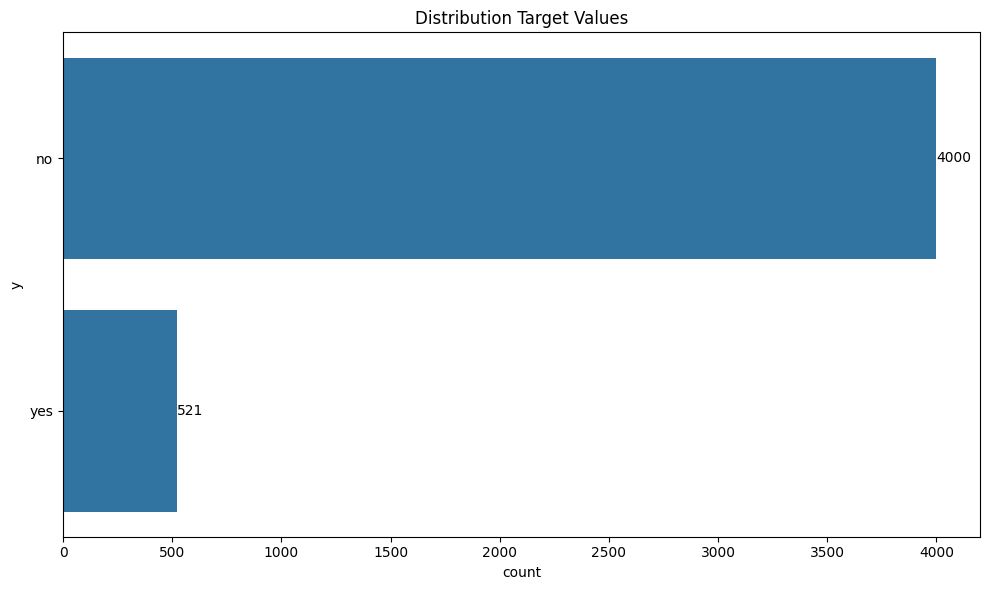

In [11]:
# Visualize distribution Target Value
figure, axis = plt.subplots(figsize=(10,6))

sns.countplot(data=df_client, y='y')
rects = axis.patches
# Make some labels.
labels = df_client['y'].value_counts()

for rect, label in zip(rects, labels):
    width = rect.get_width()
    axis.text(
        width, rect.get_y() + rect.get_height() / 2, label, ha="left", va="center")

plt.title('Distribution Target Values')
plt.tight_layout()
plt.show()


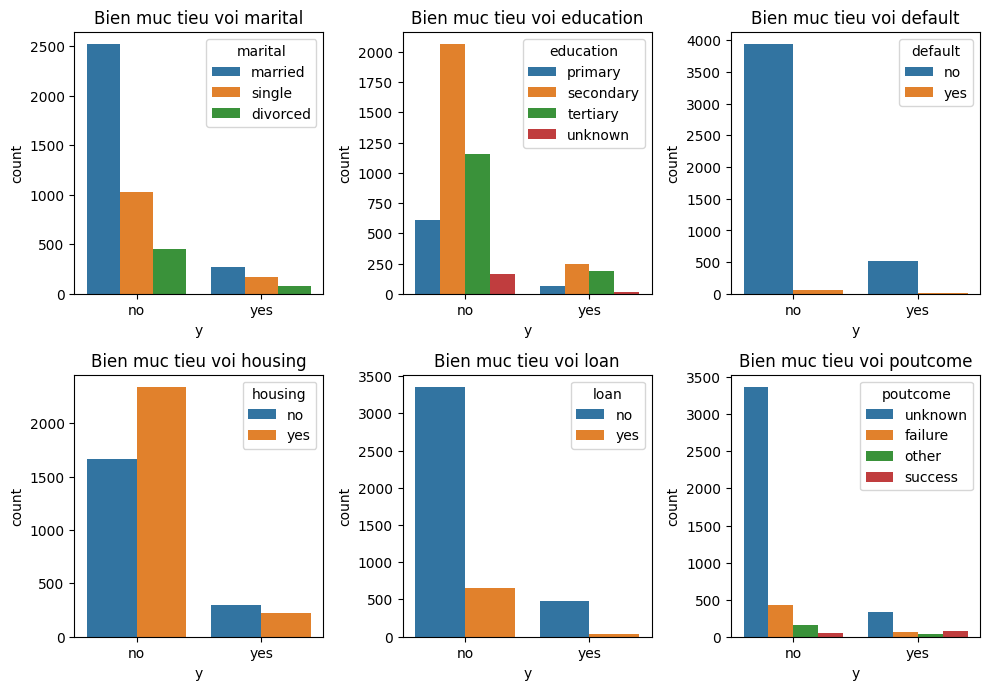

In [13]:
# Truc quan hoa bien muc tieu voi mot so thuoc tinh categery
plt.figure(figsize=(10, 10)) 
for i, col in enumerate(['marital','education','default','housing','loan','poutcome'], 1): # hàm lặp đối tượng trả về giá trị
    plt.subplot(3, 3, i)
    sns.countplot(x='y', data=df_client, hue=col)
    plt.title(f'Bien muc tieu voi {col}')
   
plt.tight_layout()
plt.show()

<h3>
    <font color="80C4E9">
    <b> >> Phan bo bien muc tieu chua deu
    <font>
</h3>

<h3>
    <font color="80C4E9">
    2.Encoding Data
    <font>
</h3>

In [12]:
# Data type numerical and categorical
categorical_df = df_client.select_dtypes(exclude=[int, float])

display(categorical_df.head())


,job,marital,education,default,housing,loan,contact,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,unknown,no
1,services,married,secondary,no,yes,yes,cellular,failure,no
2,management,single,tertiary,no,yes,no,cellular,failure,no
3,management,married,tertiary,no,yes,yes,unknown,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,unknown,no


In [13]:
list_col = []
for col in categorical_df.columns:
    value = [col, categorical_df[col].nunique()]
    list_col.append(value)

for i in list_col:
    print(i)

['job', 12]
['marital', 3]
['education', 4]
['default', 2]
['housing', 2]
['loan', 2]
['contact', 3]
['poutcome', 4]
['y', 2]


In [11]:
df_client.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [14]:
# Tao group cua feature job
job_map = {
    'management': 'White-collar',
    'admin.': 'White-collar',
    'blue-collar': 'Manual labor',
    'housemaid': 'Manual labor',
    'technician': 'Skilled professionals',
    'services': 'Service sector',
    'student': 'Non-working',
    'retired': 'Non-working',
    'unemployed': 'Non-working',
    'self-employed': 'Entrepreneurial/Independent',
    'entrepreneur': 'Entrepreneurial/Independent',
    'unknown': 'Miscellaneous',
    'unknown': 'unknown'
}

df_client['job'] = df_client['job'].map(job_map)

In [15]:
frequency_encoding = df_client['job'].value_counts(normalize=True)
df_client['job'] = df_client['job'].map(frequency_encoding)

In [16]:
df_client.job.unique()

array([0.09776598, 0.09223623, 0.32006193, 0.23401902, 0.07763769,
       0.16987392, 0.00840522])

In [17]:
# Kiem tra cac gia tri cua cot poutcome
columns = ['marital', 'contact', 'poutcome']
for col in columns:
    print(df_client[col].unique())


['married' 'single' 'divorced']
['cellular' 'unknown' 'telephone']
['unknown' 'failure' 'other' 'success']


In [18]:
# Category khong co tinh thu tu nhu marital, contact (job thi co nhieu gia tri nen dung phuong phap khac)
# Su dung phuong phap One Hot Encoding

def ohe_convert(df_cal, columns):
    for col in columns:
        df_cal = df_cal.join(pd.get_dummies(df_cal[col], prefix=col))

    return df_cal

columns_nio = ['marital', 'contact', 'poutcome']
df_client_encod = ohe_convert(df_client, columns_nio)
df_client_encod.head()


,age,job,marital,education,default,balance,housing,loan,contact,duration,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0.097766,married,primary,no,1787,no,no,cellular,79,...,False,True,False,True,False,False,False,False,False,True
1,33,0.092236,married,secondary,no,4789,yes,yes,cellular,220,...,False,True,False,True,False,False,True,False,False,False
2,35,0.320062,single,tertiary,no,1350,yes,no,cellular,185,...,False,False,True,True,False,False,True,False,False,False
3,30,0.320062,married,tertiary,no,1476,yes,yes,unknown,199,...,False,True,False,False,False,True,False,False,False,True
4,59,0.234019,married,secondary,no,0,yes,no,unknown,226,...,False,True,False,False,False,True,False,False,False,True


In [19]:
# Xoa cot nguyen ban
df_client_encod.drop(columns=columns_nio, inplace=True)
df_client_encod.head()

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0.097766,primary,no,1787,no,no,79,1,-1,...,False,True,False,True,False,False,False,False,False,True
1,33,0.092236,secondary,no,4789,yes,yes,220,1,339,...,False,True,False,True,False,False,True,False,False,False
2,35,0.320062,tertiary,no,1350,yes,no,185,1,330,...,False,False,True,True,False,False,True,False,False,False
3,30,0.320062,tertiary,no,1476,yes,yes,199,4,-1,...,False,True,False,False,False,True,False,False,False,True
4,59,0.234019,secondary,no,0,yes,no,226,1,-1,...,False,True,False,False,False,True,False,False,False,True


In [20]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [21]:
# Category co tinh tu thu tu nhu education, default, housing, loan, y
columns_hmo = ['education', 'default', 'housing', 'loan', 'y']

for col in columns_hmo:
    print(df_client[col].unique())

['primary' 'secondary' 'tertiary' 'unknown']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']


In [ ]:
# label_encoder = LabelEncoder()

# df_client_encod['education'] = label_encoder.fit_transform(df_client_encod['education'])

# df_client_encod['education'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4521 entries, 0 to 4520
Series name: education
Non-Null Count  Dtype
--------------  -----
4521 non-null   int64
dtypes: int64(1)
memory usage: 35.4 KB


In [22]:
# Replace values features with corresponding code
df_client_encod.education.replace(['primary', 'secondary', 'tertiary', 'unknown'], [1,2,3,0], inplace=True)

for col in ['default', 'housing', 'loan', 'y']:
    df_client_encod[col].replace({'no':0, 'yes':1}, inplace=True)

display(df_client_encod.head())
print(f'Chiều của bộ dữ liệu sau mã hóa\nSố dòng: {df_client_encod.shape[0]}\nSố cột: {df_client_encod.shape[1]}')

C:\Users\MYNAME\AppData\Local\Temp\ipykernel_25540\2086246115.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_client_encod.education.replace(['primary', 'secondary', 'tertiary', 'unknown'], [1,2,3,0], inplace=True)
C:\Users\MYNAME\AppData\Local\Temp\ipykernel_25540\2086246115.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0.097766,1,0,1787,0,0,79,1,-1,...,False,True,False,True,False,False,False,False,False,True
1,33,0.092236,2,0,4789,1,1,220,1,339,...,False,True,False,True,False,False,True,False,False,False
2,35,0.320062,3,0,1350,1,0,185,1,330,...,False,False,True,True,False,False,True,False,False,False
3,30,0.320062,3,0,1476,1,1,199,4,-1,...,False,True,False,False,False,True,False,False,False,True
4,59,0.234019,2,0,0,1,0,226,1,-1,...,False,True,False,False,False,True,False,False,False,True


Chiều của bộ dữ liệu sau mã hóa
Số dòng: 4521
Số cột: 22


In [23]:
df_client_encod['age_group'] = pd.cut(df_client_encod['age'], bins=[18, 30, 40, 50, 60, 100], 
                         labels = ['18-30', '30-40', '40-50', '50-60', '60+'])

df_client_encod['not_contacted_flag'] = (df_client_encod['pdays'] == -1).astype(int)
df_client_encod['high_balance_flag'] = (df_client_encod['balance'] > df_client_encod['balance'].mean()).astype(int)
df_client_encod['contact_duration_bin'] = pd.cut(df_client_encod['duration'], bins=[0, 100, 300, 600, df_client_encod['duration'].max()], 
                                    labels=['short', 'medium', 'long', 'very long'])
df_client_encod['previous_contact_flag'] = (df_client_encod['previous'] > 0).astype(int)
df_client_encod['recently_contacted'] = np.where((df_client_encod['pdays'] > 0) & (df_client_encod['pdays'] < 30), 1, 0)


In [24]:
columns_gr = ['age_group', 'contact_duration_bin']

for col in columns_gr:
    frequency_encoding = df_client_encod[col].value_counts(normalize=True)
    df_client_encod[col] = df_client_encod[col].map(frequency_encoding)

In [25]:
# Xoa cot nguyen ban
# df_client_encod.drop(columns=columns_gr, inplace=True)
df_client_encod.head()

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group,not_contacted_flag,high_balance_flag,contact_duration_bin,previous_contact_flag,recently_contacted
0,30,0.097766,1,0,1787,0,0,79,1,-1,...,False,False,False,True,0.139792,1,1,0.236673,0,0
1,33,0.092236,2,0,4789,1,1,220,1,339,...,True,False,False,False,0.398142,0,1,0.483964,1,0
2,35,0.320062,3,0,1350,1,0,185,1,330,...,True,False,False,False,0.398142,0,0,0.483964,1,0
3,30,0.320062,3,0,1476,1,1,199,4,-1,...,False,False,False,True,0.139792,1,1,0.483964,0,0
4,59,0.234019,2,0,0,1,0,226,1,-1,...,False,False,False,True,0.176952,1,0,0.483964,0,0


In [27]:
df_client_encod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    4521 non-null   int64   
 1   job                    4521 non-null   float64 
 2   education              4521 non-null   int64   
 3   default                4521 non-null   int64   
 4   balance                4521 non-null   int64   
 5   housing                4521 non-null   int64   
 6   loan                   4521 non-null   int64   
 7   duration               4521 non-null   int64   
 8   campaign               4521 non-null   int64   
 9   pdays                  4521 non-null   int64   
 10  previous               4521 non-null   int64   
 11  y                      4521 non-null   int64   
 12  marital_divorced       4521 non-null   bool    
 13  marital_married        4521 non-null   bool    
 14  marital_single         4521 non-null   b

In [28]:
df_client.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

<h3>
    <font color="80C4E9">
    3.Kiểm tra Correlation
    <font>
</h3>

In [43]:
numerical_df = df_client_encod.select_dtypes(include=[int, float])
numerical_df

,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,y,recently_contact_flag,no_contact_flag,high_balace_flag,previous_contact_flag
0,30,1,0,1787,0,0,79,1,-1,0,0,0,1,1,0
1,33,2,0,4789,1,1,220,1,339,4,0,0,0,1,1
2,35,3,0,1350,1,0,185,1,330,1,0,0,0,0,1
3,30,3,0,1476,1,1,199,4,-1,0,0,0,1,1,0
4,59,2,0,0,1,0,226,1,-1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,2,0,-333,1,0,329,5,-1,0,0,0,1,0,0
4517,57,3,1,-3313,1,1,153,1,-1,0,0,0,1,0,0
4518,57,2,0,295,0,0,151,11,-1,0,0,0,1,0,0
4519,28,2,0,1137,0,0,129,4,211,3,0,0,0,0,1


In [44]:
numerical_df.corr()['y']

age                      0.045092
education                0.050265
default                  0.001303
balance                  0.017905
housing                 -0.104683
loan                    -0.070517
duration                 0.401118
campaign                -0.061147
pdays                    0.104087
previous                 0.116714
y                        1.000000
recently_contact_flag    0.003269
no_contact_flag         -0.162038
high_balace_flag         0.065137
previous_contact_flag    0.162038
Name: y, dtype: float64

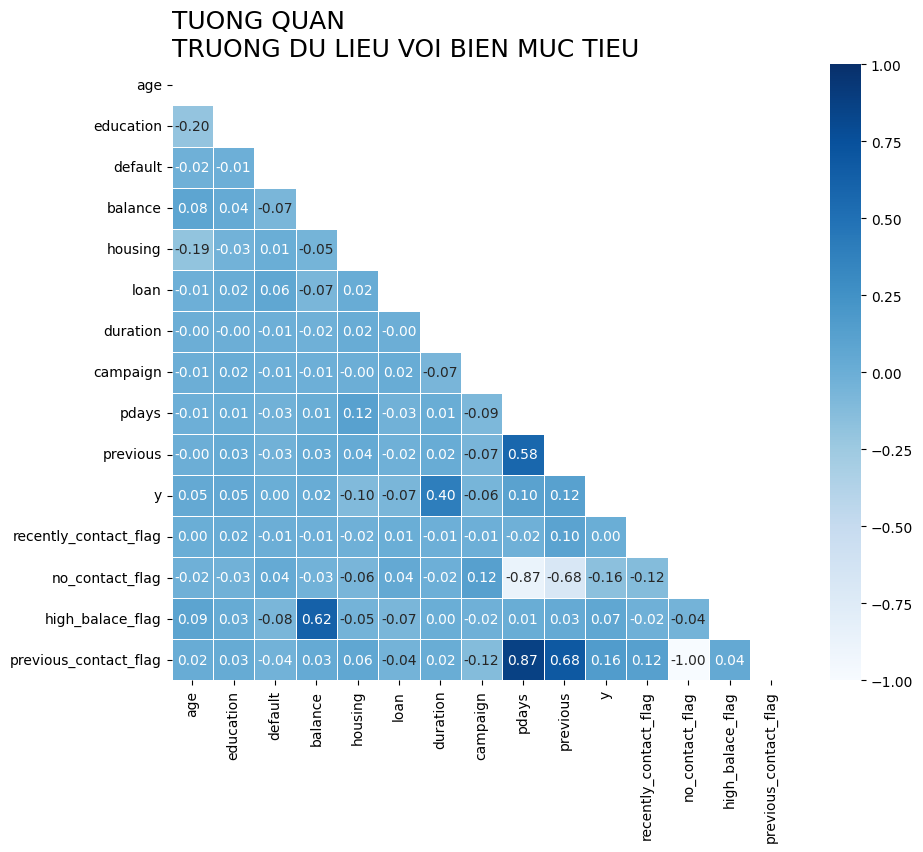

In [45]:
# Visualize correlation with target value
matrix = np.triu(numerical_df.corr())

figure, axis = plt.subplots(figsize=(10,8))

color = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(data=numerical_df.corr(), mask=matrix, annot=True, cmap=color, fmt='.2f', linewidths=0.5, vmax=1, vmin=-1)

title = "TUONG QUAN\nTRUONG DU LIEU VOI BIEN MUC TIEU"
axis.set_title(title, loc='left', fontsize=18)

plt.show()


<h3>
    <font color="80C4E9">
    <b> >> Bien muc tieu tuong quan duong voi features age, education, balance, duration, pdays va previous<br>
    tuong quan am voi housing, loan, campaign
    <font>
</h3>

<h3>
    <font color="80C4E9">
    4.Xu ly Imbalance Data
    <font>
</h3>

In [29]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle


In [30]:
df_client_encod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    4521 non-null   int64   
 1   job                    4521 non-null   float64 
 2   education              4521 non-null   int64   
 3   default                4521 non-null   int64   
 4   balance                4521 non-null   int64   
 5   housing                4521 non-null   int64   
 6   loan                   4521 non-null   int64   
 7   duration               4521 non-null   int64   
 8   campaign               4521 non-null   int64   
 9   pdays                  4521 non-null   int64   
 10  previous               4521 non-null   int64   
 11  y                      4521 non-null   int64   
 12  marital_divorced       4521 non-null   bool    
 13  marital_married        4521 non-null   bool    
 14  marital_single         4521 non-null   b

In [32]:
df_client_imbalance = df_client_encod.copy()
df_client_encod = shuffle(df_client_encod)

In [29]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

In [33]:
# Chia bo du lieu thanh cac thuoc tinh va gia tri muc tieu
X = df_client_imbalance.drop(columns=['y'])
y = df_client_imbalance['y']

# display(y.value_counts())
print(Counter(y))

Counter({0: 4000, 1: 521})


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(len(X_train))

3616


In [35]:
# Thuc hien tang label thieu so de bo du lieu duoc can bang
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_re, y_train_re = oversample.fit_resample(X_train, y_train)

print(Counter(y_train_re))


Counter({0: 3207, 1: 3207})


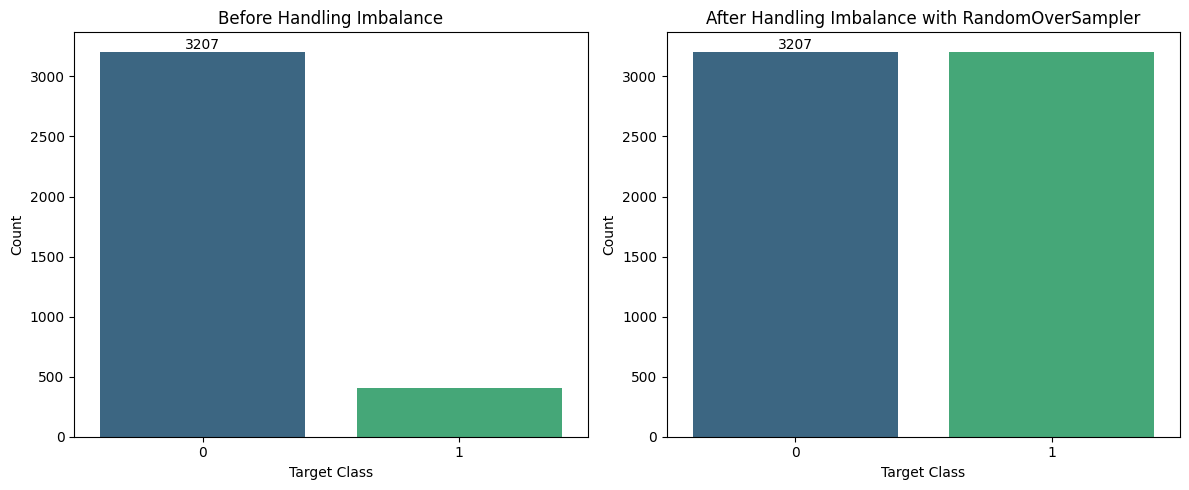

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y_train, ax=ax[0], hue=y_train, palette="viridis", legend=False)
ax[0].set_title("Before Handling Imbalance")
ax[0].set_xlabel("Target Class")
ax[0].set_ylabel("Count")
ax[0].bar_label(ax[0].containers[0], label_type='edge')

sns.countplot(x=y_train_re, ax=ax[1], hue=y_train_re, palette="viridis", legend=False)
ax[1].set_title("After Handling Imbalance with RandomOverSampler")
ax[1].set_xlabel("Target Class")
ax[1].set_ylabel("Count")
ax[1].bar_label(ax[1].containers[0], label_type='edge')

plt.tight_layout()
plt.show()

<h3>
    <font color="80C4E9">
    5.Xu ly Scaling Data
    <font>
</h3>

In [37]:
# Do gia tri bien muc tieu thuoc kieu phan loai (category) 
# >> Su dung phuong phap Min-Max Scaling Normalization va thuat toan su dung la Logistics Regression or KNN

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    4521 non-null   int64   
 1   job                    4521 non-null   float64 
 2   education              4521 non-null   int64   
 3   default                4521 non-null   int64   
 4   balance                4521 non-null   int64   
 5   housing                4521 non-null   int64   
 6   loan                   4521 non-null   int64   
 7   duration               4521 non-null   int64   
 8   campaign               4521 non-null   int64   
 9   pdays                  4521 non-null   int64   
 10  previous               4521 non-null   int64   
 11  poutcome               4521 non-null   object  
 12  marital_divorced       4521 non-null   bool    
 13  marital_married        4521 non-null   bool    
 14  marital_single         4521 non-null   b

In [30]:
X.previous.unique()

array([ 0,  4,  1,  3,  2,  5, 20,  7,  6, 10,  9,  8, 18, 19, 12, 13, 11,
       14, 15, 24, 17, 22, 23, 25])

In [38]:
# Thuc hien scaling voi cac cot age, balance, duration, campaign, pdays, previous

# def minmax_scaler(X, list_col):
#     for col in list_col:
#         mm_scal = MinMaxScaler()
#         mm_scal.fit(X[[col]])
#         X[col] =  mm_scal.transform(X[[col]])

#     return X

# def standard_scaler(X, list_col):
#     for col in list_col:
#         mm_scal = StandardScaler()
#         mm_scal.fit(X[[col]])
#         X[col] =  mm_scal.transform(X[[col]])
    
#     return X

# list_col = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
# X_mms = minmax_scaler(X, list_col)
# X_mms.head()

std_scaler = StandardScaler().fit(X_train_re)

X_train_re = std_scaler.transform(X_train_re)
X_test = std_scaler.transform(X_test)



In [ ]:
# list_col = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
# X_ss = standard_scaler(X, list_col)
# X_ss.head()

,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,...,recently_contacted,age_group_18-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60+,contact_duration_bin_short,contact_duration_bin_medium,contact_duration_bin_long,contact_duration_bin_very long
0,-0.994990,1,0,0.102439,0,0,-0.888882,-0.571294,-0.484716,-0.415828,...,0,True,False,False,False,False,True,False,False,False
1,-0.740066,2,0,1.168056,1,1,-0.483567,-0.571294,2.579903,1.690297,...,0,False,True,False,False,False,False,True,False,False
2,-0.570117,3,0,-0.052683,1,0,-0.584178,-0.571294,2.498781,0.110703,...,0,False,True,False,False,False,False,True,False,False
3,-0.994990,3,0,-0.007957,1,1,-0.543934,0.536402,-0.484716,-0.415828,...,0,True,False,False,False,False,False,True,False,False
4,1.469276,2,0,-0.531891,1,0,-0.466320,-0.571294,-0.484716,-0.415828,...,0,False,False,False,True,False,False,True,False,False


<h3>
    <font color="80C4E9">
    6.Huan luyen thuat toan & danh gia
    <font>
</h3>

In [40]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score, confusion_matrix, classification_report
)
from sklearn.metrics import ConfusionMatrixDisplay


# kiem dinh cheo
from sklearn.model_selection import GridSearchCV 

In [41]:
def _tunning_model(model, X_train, X_test, y_train, y_test):
    # Train and predict target value
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Ma tran nham lan va truc quan hoa
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=model.classes_)
    # display(cm)

    visual_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    # visual_cm.plot()

    # Thong thuong cac chi so danh gia thuat toan y_test truyen vao truoc, y_pred theo sau
    acc = round(accuracy_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    prec = round(precision_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)

    return model, acc, recall, prec, f1, classification_report(y_test, y_pred), visual_cm

DecisionTreeClassifier(max_depth=5)
0.7204
0.8214
0.2831
0.4211
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       793
           1       0.28      0.82      0.42       112

    accuracy                           0.72       905
   macro avg       0.62      0.76      0.62       905
weighted avg       0.88      0.72      0.77       905



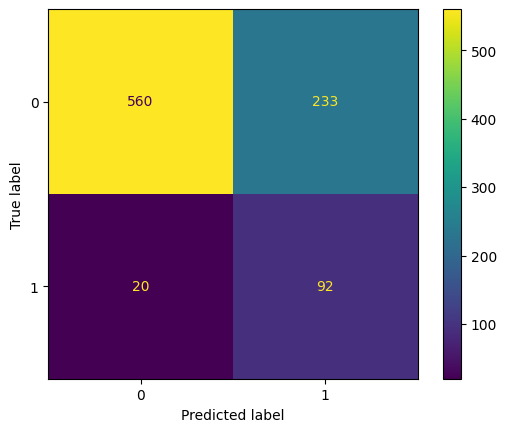

In [42]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5)

model, acc, recall, prec, f1, report, visual_cm = _tunning_model(dtc, X_train_re, X_test, y_train_re, y_test)
print(model)
print(acc)
print(recall)
print(prec)
print(f1)
print(report)
visual_cm.plot()

In [46]:
md_dec_tree_list = []
depth =[5, 9, 15, 20, 30]

for i in range(len(depth)):
    md= {}

    dtc = DecisionTreeClassifier(criterion='gini', max_depth=depth[i])
    model, acc, recall, prec, f1, report, visual_cm = _tunning_model(dtc, X_train_re, X_test, y_train_re, y_test)

    md['name_model'] = model
    md['acc'] = acc
    md['recall'] = recall
    md['prec'] = prec
    md['f1'] = f1
    md['report'] = report
    md['visual'] = visual_cm
    md_dec_tree_list.append(md)

In [47]:
df_data = pd.DataFrame(md_dec_tree_list, columns=['name_model', 'acc', 'recall', 'prec', 'f1', 'report', 'visual'])
df_data.columns = ['name_model', 'acc', 'recall on GOOD', 'prec on GOOD', 'f1', 'report', 'visual']

df_data 

,name_model,acc,recall on GOOD,prec on GOOD,f1,report,visual
0,DecisionTreeClassifier(max_depth=5),0.7182,0.8036,0.2786,0.4138,precision recall f1-score ...,<sklearn.metrics._plot.confusion_matrix.Confus...
1,DecisionTreeClassifier(max_depth=9),0.7746,0.7679,0.3258,0.4574,precision recall f1-score ...,<sklearn.metrics._plot.confusion_matrix.Confus...
2,DecisionTreeClassifier(max_depth=15),0.8221,0.5179,0.3515,0.4188,precision recall f1-score ...,<sklearn.metrics._plot.confusion_matrix.Confus...
3,DecisionTreeClassifier(max_depth=20),0.8453,0.4107,0.3833,0.3966,precision recall f1-score ...,<sklearn.metrics._plot.confusion_matrix.Confus...
4,DecisionTreeClassifier(max_depth=30),0.8586,0.3571,0.4167,0.3846,precision recall f1-score ...,<sklearn.metrics._plot.confusion_matrix.Confus...


In [60]:
rf_best = DecisionTreeClassifier()

# GridsearchCV
grid_space = {
              'max_depth':[5,10,15,20,30],
              'criterion':['gini','entropy']}

# param:
# 5 - 201 - gini      > Recall: ...
# 5 - 201 - entropy   > Recall: ...
# 10 - 301 - gini     > Recall: ...
# 10 - 301 - entropy  > Recall: ...
# 5 - 301 - gini      > Recall: ...
# 5 - 301 - entropy   > Recall: ...

rf_grid = GridSearchCV(rf_best, param_grid=grid_space, scoring='precision')
model_grid = rf_grid.fit(X_train_re, y_train_re)

# Best hyperparameters
print('Best hyperparameters: '+str(model_grid.best_params_))
print('Best score: '+str(model_grid.best_score_))

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 30}
Best score: 0.9169022084055019


DecisionTreeClassifier(max_depth=15)
0.8265
0.5357
0.3636
0.4332
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       793
           1       0.36      0.54      0.43       112

    accuracy                           0.83       905
   macro avg       0.65      0.70      0.67       905
weighted avg       0.86      0.83      0.84       905



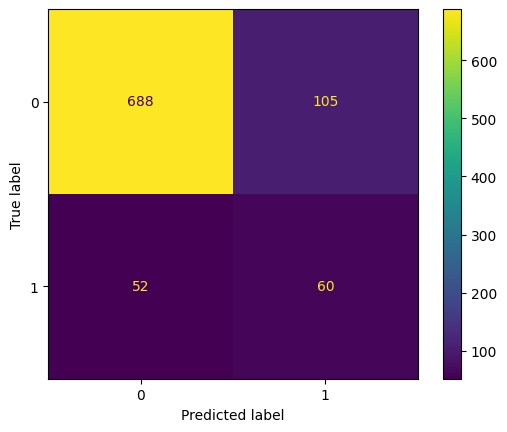

In [48]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=15)

model, acc, recall, prec, f1, report, visual_cm = _tunning_model(dtc, X_train_re, X_test, y_train_re, y_test)
print(model)
print(acc)
print(recall)
print(prec)
print(f1)
print(report)
visual_cm.plot()

In [49]:
from sklearn import tree


In [50]:
text_representation = tree.export_text(model)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

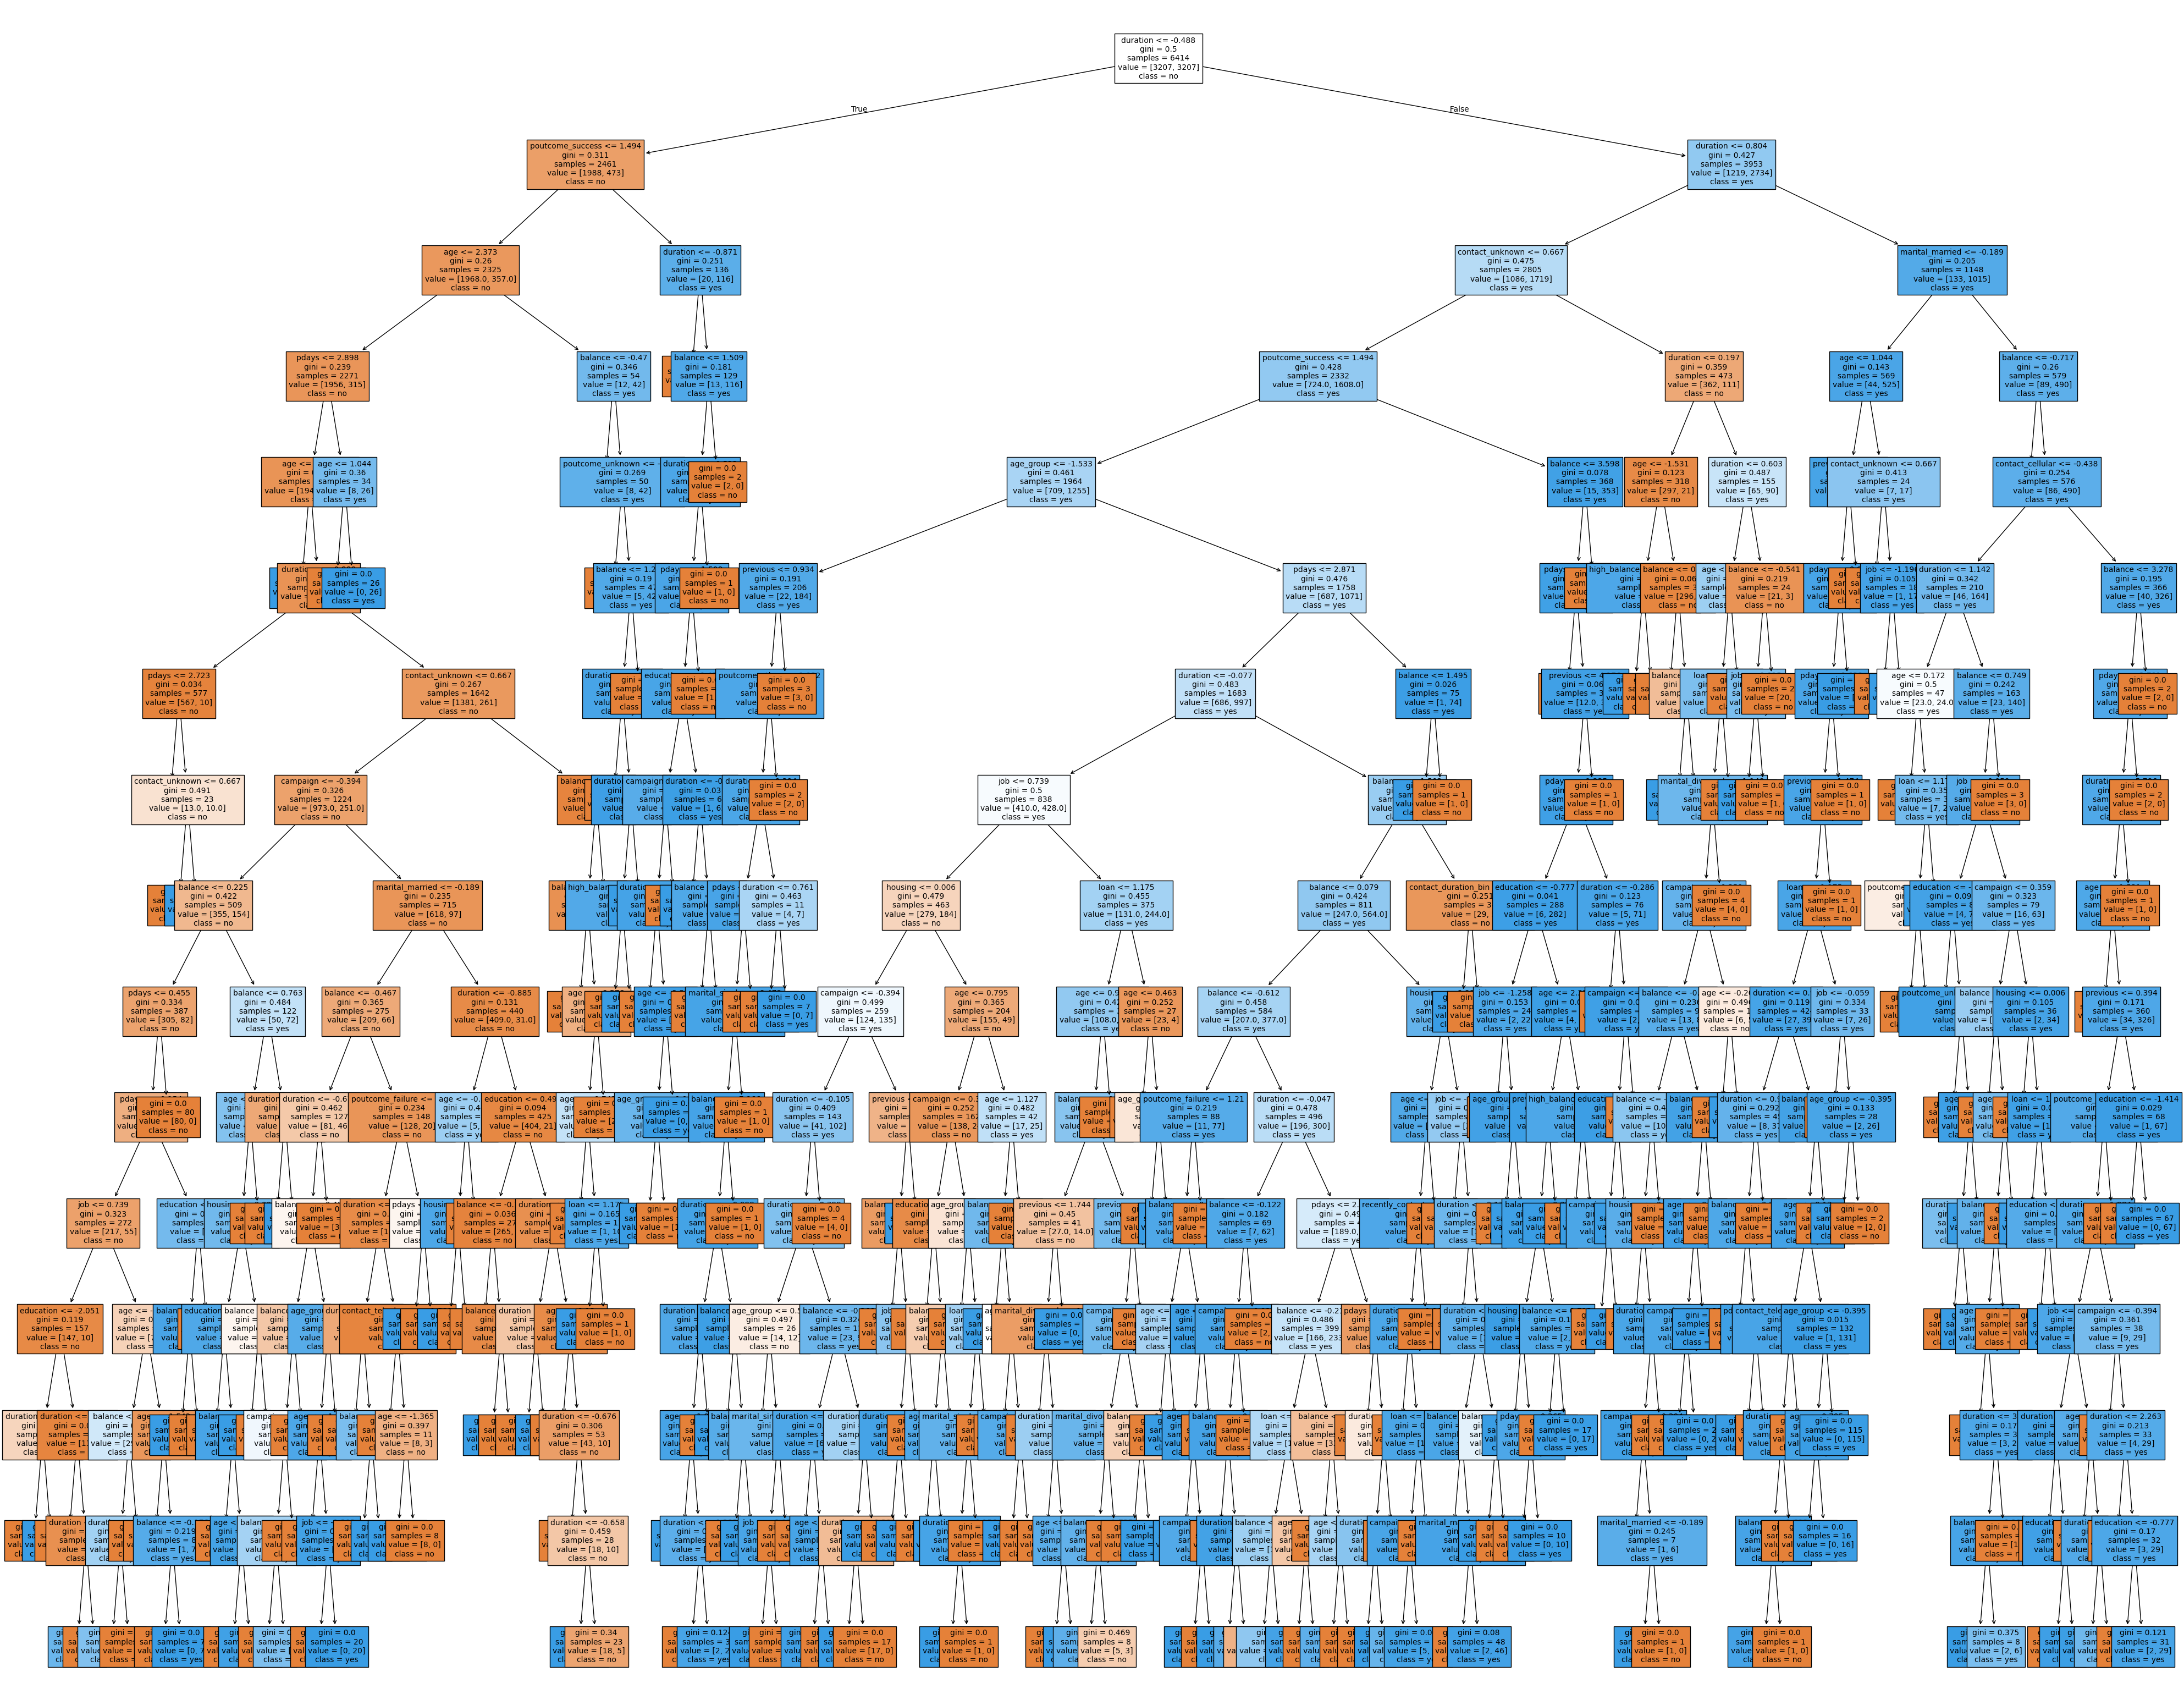

In [55]:
fig = plt.figure(figsize=(50,40))

viz_model = tree.plot_tree(df_data.iloc[2,0],
                           feature_names=X.columns,
                           class_names=['no', 'yes'],
                           fontsize=10,
                           filled=True)

In [57]:
import dtreeviz

viz_model = dtreeviz.model(df_data.iloc[0,0],
                           X_train=X_train_re, y_train=y_train_re,
                           feature_names=X.columns,
                           target_name='Risk', class_names=['no', 'yes'])

In [58]:
viz_model.view()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [142]:
# Chia bo du lieu de huan luyen va danh gia
X_mms_train, X_mms_test, y_mms_train, y_mms_test = train_test_split(X_mms, y, test_size=0.2, random_state=0)
print(len(X_mms_train))

6400


In [143]:
# Xao tron bo du lieu

X_ss_train, X_ss_test, y_ss_train, y_ss_test = train_test_split(X_ss, y, test_size=0.2, random_state=0)
print(len(X_ss_train))

6400


In [148]:
# Huan luyen mo hinh voi Logistics Regression
lgr = LogisticRegression()
lgr.fit(X_ss_train, y_ss_train)

LogisticRegression()

In [149]:
y_ss_predict = lgr.predict(X_ss_test)
print(f'Du doan cua thuat toan: \n{y_ss_predict}')
print(f'Du lieu thuc te: \n{y_ss_test}')


Du doan cua thuat toan: 
[0 0 1 ... 0 0 1]
Du lieu thuc te: 
3069    0
1675    0
6385    1
543     0
3213    0
       ..
7716    1
4766    1
4096    0
1595    0
5023    1
Name: y, Length: 1600, dtype: int64


In [150]:
# Danh gia thuat toan
print(f"Do chinh xac cua mo hinh: {round(accuracy_score(y_ss_test, y_ss_predict), 4)}")
print(f"Do chinh xac cua mo hinh: {round(accuracy_score(y_ss_predict, y_ss_test), 4)}")

# print(f"Do chuan xac tren lop GOOD cua mo hinh: {round(precision_score(y_test, y_predict), 4)}")
# print(f"Do nhay tren lop GOOD cua mo hinh: {round(recall_score(y_test, y_predict), 4)}")
# print(f"Trung binh dieu hoa Precision va Recall cua mo hinh: {round(f1_score(y_test, y_predict), 4)}")



Do chinh xac cua mo hinh: 0.8206
Do chinh xac cua mo hinh: 0.8206


<h5>
    <font color="80C4E9">
    Diễn giải <br>
    Độ chính xác của mô hình (accuracy_score) khả năng dự đoán đúng của mô hình: 48,81%<br>
    Độ chuẩn xác của mô hình trên lớp GOOD (precision_score) trong những dự đoán GOOD của mô hình thì có bao nhiêu GOOD case thực sự là GOOD<br>
    Độ nhạy trên lớp GOOD (recall_score) khả năng mô hình sẽ dự đoán GOOD case chính xác trong sô GOOD case thực sự<br>
    Trung bình điều hòa (f1_score) là 'khoảng cách' hay mức độ chênh lệch giữa Precision và Recall 
    <font>
</h5>

In [151]:
# Huan luyen mo hinh voi KNN
knn = KNeighborsClassifier()
knn.fit(X_mms_train, y_mms_train)

KNeighborsClassifier()

In [152]:
y_knn_predict = knn.predict(X_mms_test)

# Danh gia thuat toan
print(f"Do chinh xac cua mo hinh: {round(accuracy_score(y_mms_test, y_knn_predict), 4)}")
print(f"Do chuan xac tren lop GOOD cua mo hinh: {round(precision_score(y_mms_test, y_knn_predict), 4)}")
print(f"Do nhay tren lop GOOD cua mo hinh: {round(recall_score(y_mms_test, y_knn_predict), 4)}")
print(f"Trung binh dieu hoa Precision va Recall cua mo hinh: {round(f1_score(y_mms_test, y_knn_predict), 4)}")

Do chinh xac cua mo hinh: 0.8875
Do chuan xac tren lop GOOD cua mo hinh: 0.8239
Do nhay tren lop GOOD cua mo hinh: 0.985
Trung binh dieu hoa Precision va Recall cua mo hinh: 0.8973
